# Kitabxanalar

In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score

In [546]:
#datanı çəkirik
df = pd.read_csv("mushrooms.csv")

In [547]:
#datanın kopyasını alırıq.
data = df.copy()

In [548]:
#dataya ön baxış.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [549]:
#Bir funksiya ilə data haqqında ümumi məlumat əldə etmək üçün funksiya
def info(data):
    """
      Data haqqında ümumi informasiya alır.
      
      param :data: Dataframe.
    """
    
    print("Proses Başladı.\n")
    
    print(f"Datanın Ölçüsü: Sətir : {data.shape[0]}, Sütun: {data.shape[1]}\n")
    
    print(f"Datada Təkrarlanan Sətirlərin Sayı: {data.duplicated().sum()}\n\n")
    
    print(f"Datanın Ümumi Atributlarının Siyahısı.\n")
    print(data.columns.to_list())
    
    print("\nTarget sütunundakı gruplar və onların sayı:")
    print(data["class"].value_counts())
    
    
    if len(data.select_dtypes(include = "O").columns)!=0: 
            print(f"\n\nDatanın Object Tip Atributlarının Sayı: {len(data.select_dtypes(include = 'O').columns)}\n")
            print(f"Datanın Object Tip Atributlarının Siyahısı.\n")
            print(data.select_dtypes(include = "O").columns.to_list())

    if len(data.select_dtypes(include = "number").columns)!=0:
            print(f"\n\nDatanın Numeric Tip sütunların Sayı: {len(data.select_dtypes(include = 'number').columns)}\n")
            print(f"Datanın Numeric Tip sütunların Siyahısı.\n")
            print(data.select_dtypes(include = "number").columns.to_list())
            
            
    if data.isnull().any().any():    
        print("\n\nDatadakı Çatışmayan Dəyərlər.\n")  
        for col in [col for col in data.isnull().any().index]:  
            print(f"Sütun Adı: {col}")
            print(f"{col}-Sütunundakı Çatışmayan Dəyərlərin Sayı: {data[col].isnull().sum()}")
            print("#"*20,end="\n\n")       
        print(f"Ümumi Datadakı Çatışmayan Dəyərlərin Sayı: {data.isnull().sum().sum()}")
    else:
        print("\n\nDatanın Heç Bir Sütununda Çatışmayan Dəyər Yoxdur.")  

In [550]:
#Buradan görünür ki bizim datamızda numeric type sütun yoxdur.
info(data)

Proses Başladı.

Datanın Ölçüsü: Sətir : 8124, Sütun: 23

Datada Təkrarlanan Sətirlərin Sayı: 0


Datanın Ümumi Atributlarının Siyahısı.

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Target sütunundakı gruplar və onların sayı:
e    4208
p    3916
Name: class, dtype: int64


Datanın Object Tip Atributlarının Sayı: 23

Datanın Object Tip Atributlarının Siyahısı.

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',

In [551]:
data.describe().T.iloc[:,1:]
#Dataların unique dəyərlərinin sayına baxdıqda dəqiqliklə söyləmək olar ki bütün dəyərlər həqiqətdə category tipdədir.

,unique,top,freq
class,2,e,4208
cap-shape,6,x,3656
cap-surface,4,y,3244
cap-color,10,n,2284
bruises,2,f,4748
odor,9,n,3528
gill-attachment,2,f,7914
gill-spacing,2,c,6812
gill-size,2,b,5612
gill-color,12,b,1728


In [552]:
#Bütün sütunların dağılımlarına baxmaq üçün bir funksiya yazaq.

In [553]:
def histplot(data):
    columns_num = data.shape[1]
    fig,ax = plt.subplots(ncols=2,nrows = columns_num//2+1,figsize=(14,28))
    i=0;j=0
    for col in data.columns:
        if i==2:
            i=0
            j=j+1
        sns.barplot(data[col].value_counts().reset_index(),x = "index",y =col,ax = ax[j][i])
        i+=1

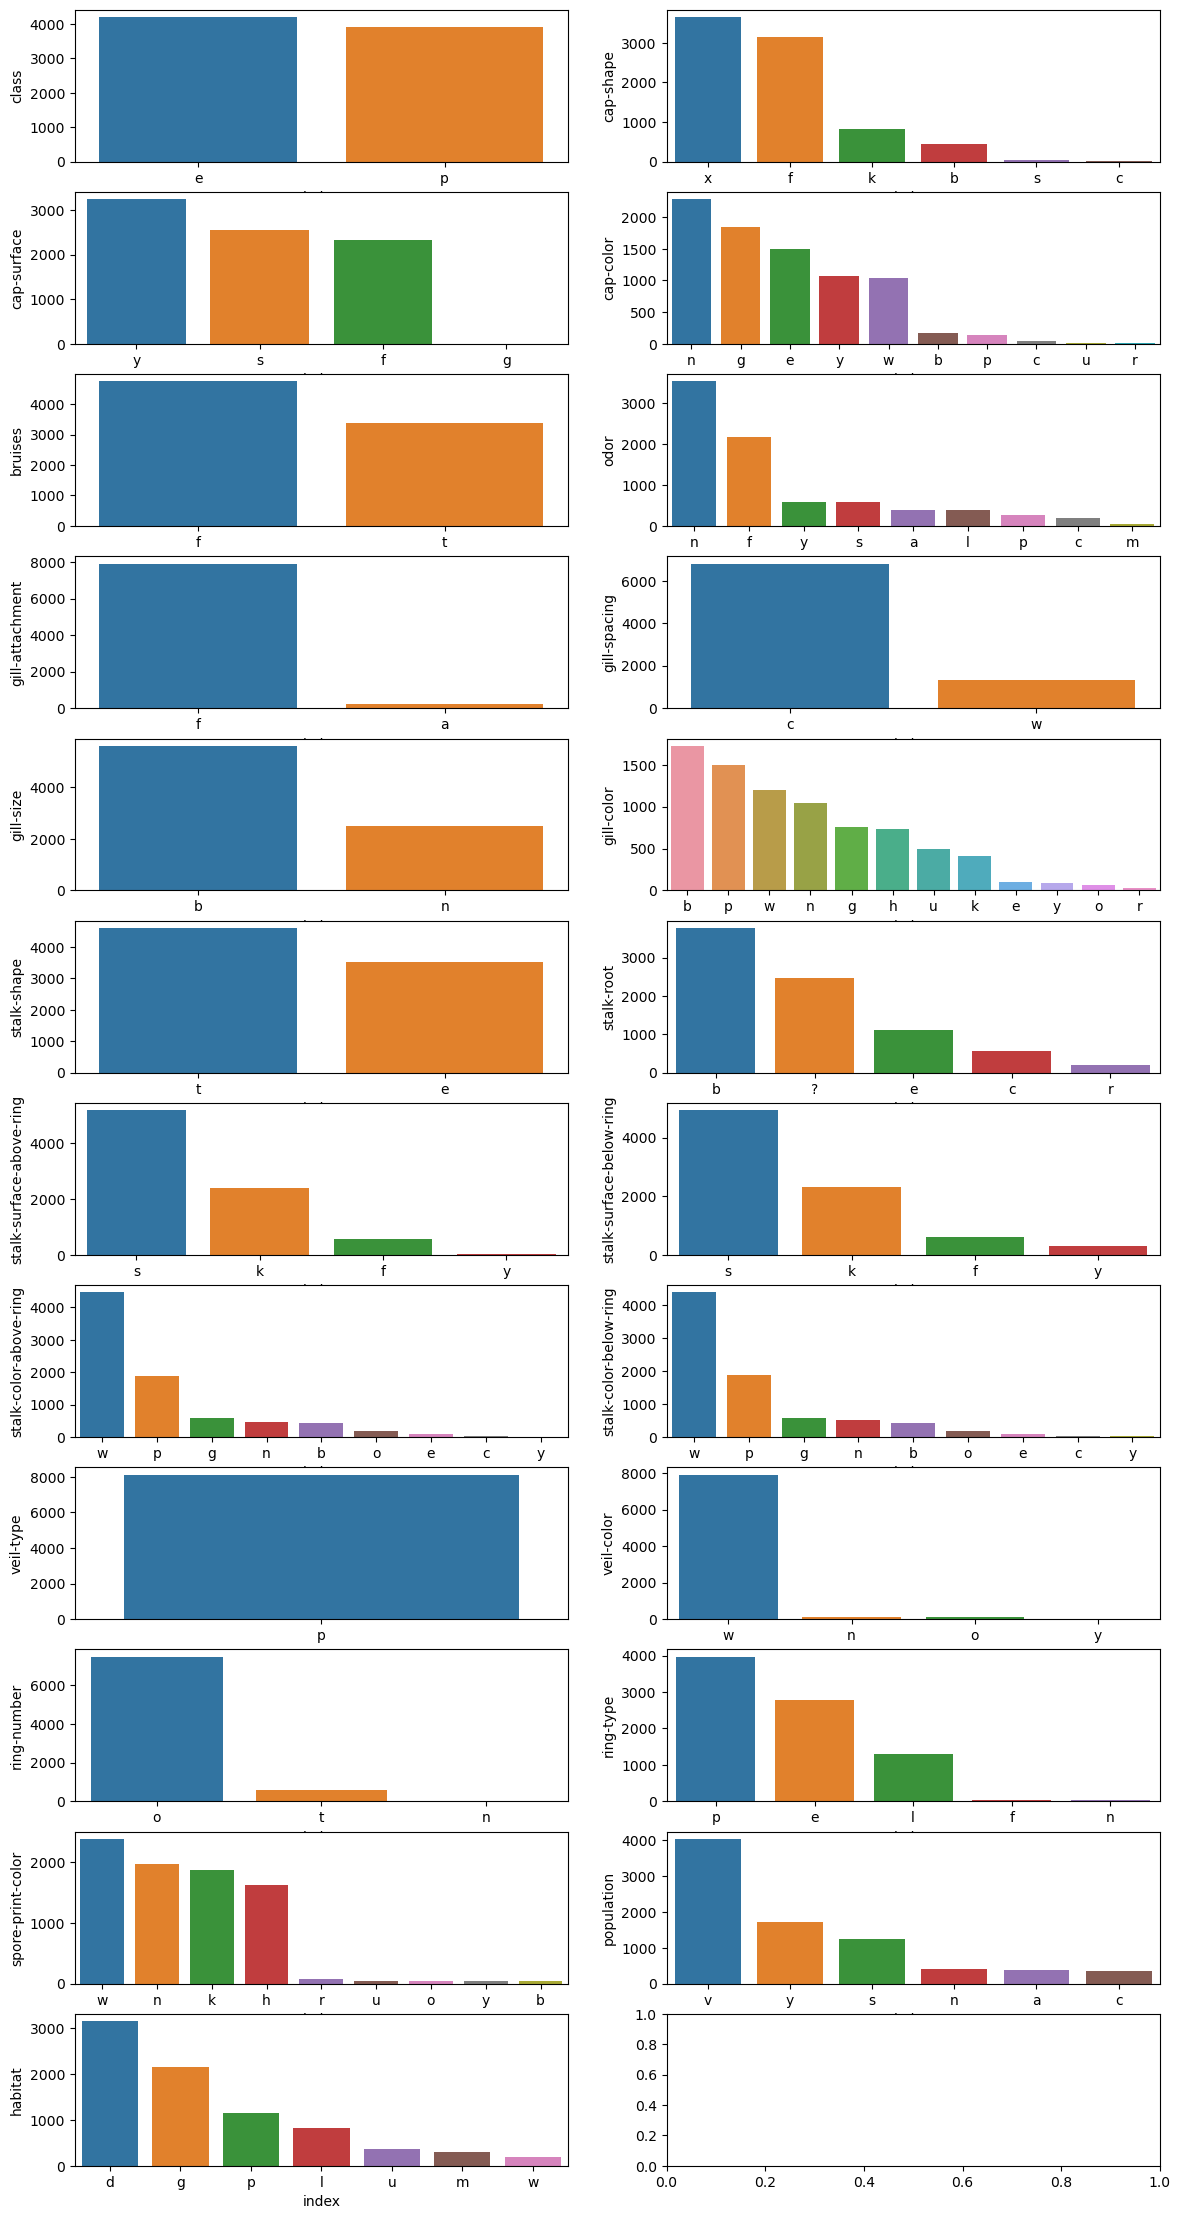

In [554]:
histplot(data)

In [555]:
#Qrafiklərə baxdıqda görünür ki veil type sütununda yalnız bir unique dəyər vardır.Bu sütun sabit kimi görünür və bu sütunu modeldən atmaq olar.
#Sütunu atmazdan qabaq Analizi dəqiqləşdirək.

In [556]:
data["veil-type"].value_counts()


p    8124
Name: veil-type, dtype: int64

In [557]:
#Artıq Bu sütunu ata bilərik.
data.drop(columns="veil-type",axis = 1,inplace = True)

# Encoding

Sütunlardakı qrup sayları iki olan sütunları One hot Encoding edə bilərik.Lakin qrup sayları çox olan sütunları test edib qruplar arasında target sütununa görə fərqlilik olub olmadığını analiz edəcik.

In [558]:
#Qrup sayları iki olan sütunların atributlarının siyahısını alırıq.
one_hot_cols = [col for col in data.columns if data[col].nunique()==2]

#Onları One Hot Encoding edirik.
data = pd.get_dummies(data=data,columns=list(one_hot_cols),drop_first=True)

Qrup sayları çox olan sütunların qrupları arasında sıralama olanları Ordinal Encoding, Sıralama olmayanları isə Label Encoding edəcik.

In [559]:
#Qrup sayları çox olan sütunları Analiz etmək üçün sütunlarımızı ayrıca bir dataframe də yadda saxlayırıq.
data_encod_analiz = data.loc[:,"cap-shape":"class_p"]

In [560]:
data_encod_analiz

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_p
0,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u,1
1,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g,0
2,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m,0
3,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u,1
4,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,n,y,?,s,s,o,o,o,o,p,b,c,l,0
8120,x,s,n,n,y,?,s,s,o,o,n,o,p,b,v,l,0
8121,f,s,n,n,n,?,s,s,o,o,o,o,p,b,c,l,0
8122,k,y,n,y,b,?,s,k,w,w,w,o,e,w,v,l,1


### Cap shape sütunu

In [561]:
data_cap = data_encod_analiz.groupby("cap-shape")[["class_p"]].agg(["mean","sum","count"]).T
data_cap

cap-shape               b    c            f           k     s            x
class_p mean     0.106195  1.0     0.493655    0.724638   0.0     0.467177
        sum     48.000000  4.0  1556.000000  600.000000   0.0  1708.000000
        count  452.000000  4.0  3152.000000  828.000000  32.0  3656.000000

Buradan görürük ki papaq forması sunken (s) olan göbələklərdən yalnız 32 dəyər və conical (c) olanlardan yalnız 4 dəyər var.Və buradan görünür ki papaq forması sunken (c) olan göbələklərdən heç biri zəhərli göbələk deyil.Və conical (c) olan göbələklərdən hamısı zəhərlidir.Burada qrup saylarında dəyərlərin azlığı bizə buradan nəticəyə varmağımıza kömək etmir.Papaq forması knobbed (k) olan göbələklərdən 72 faizi zəhərli növə aiddir, lakin sample sayı azdır.Eyni ilə convex (x) göbələklərin zəhərlilik faizi də daha çoxdur eyni ilə sample sayı.Bu sütunu One Hot Encoding edərək modelə əlavə etməyimiz daha yaxşı olar çünki qruplar arasında ciddi şəkildə bir fərq yoxdur.

In [562]:
data_encod_analiz = pd.get_dummies(data = data_encod_analiz,columns =["cap-shape"],drop_first=True)

In [563]:
data_encod_analiz

,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,...,ring-type,spore-print-color,population,habitat,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,s,n,p,k,e,s,s,w,w,w,...,p,k,s,u,1,0,0,0,0,1
1,s,y,a,k,c,s,s,w,w,w,...,p,n,n,g,0,0,0,0,0,1
2,s,w,l,n,c,s,s,w,w,w,...,p,n,n,m,0,0,0,0,0,0
3,y,w,p,n,e,s,s,w,w,w,...,p,k,s,u,1,0,0,0,0,1
4,s,g,n,k,e,s,s,w,w,w,...,e,n,a,g,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,n,n,y,?,s,s,o,o,o,...,p,b,c,l,0,0,0,1,0,0
8120,s,n,n,y,?,s,s,o,o,n,...,p,b,v,l,0,0,0,0,0,1
8121,s,n,n,n,?,s,s,o,o,o,...,p,b,c,l,0,0,1,0,0,0
8122,y,n,y,b,?,s,k,w,w,w,...,e,w,v,l,1,0,0,1,0,0


### Cap Surface sütunu

In [564]:
data_cap = data_encod_analiz.groupby("cap-surface")[["class_p"]].agg(["mean","sum","count"]).T
data_cap

cap-surface              f    g            s            y
class_p mean      0.327586  1.0     0.552426     0.536375
        sum     760.000000  4.0  1412.000000  1740.000000
        count  2320.000000  4.0  2556.000000  3244.000000

Bu sütuna baxdığda belə görünür ki, s və y tipli papaq səthi olan göbələklərin zəhərlilik oranları ilə zəhərli olmama oranları 50 ye 50 dir hardasa.Hardasa eyni sayda da f papaq səthi olan göbələklərin zəhərlili olanların sayı ümumi sayın 32 faizini təşkil edir.g qrupu üçün isə nəsə demək olmur.Bu qrupdan 4 göbələkdən 1 -i zəhərli olduğu üçün f qrupu ilə eyni kodlamamız problem yaratmaz. Buradan Biz s və y qruplarını bir kodlayıb f və g qruplarını da bir kodlayaraq modelə əlavə edə bilərik.

In [565]:
data_encod_analiz["cap-surface"] = data_encod_analiz["cap-surface"].apply(lambda x : 1 if x=="f"else 1 if x=="g" else 0)

In [566]:
data_encod_analiz["cap-surface"].value_counts()

0    5800
1    2324
Name: cap-surface, dtype: int64

### Cap Color sütunu

In [567]:
data_cap = data_encod_analiz.groupby("cap-color")[["class_p"]].agg(["mean","sum","count"]).T
data_cap

cap-color               b          c         e           g            n  \
class_p mean     0.714286   0.272727     0.584     0.43913     0.446585   
        sum    120.000000  12.000000   876.000   808.00000  1020.000000   
        count  168.000000  44.000000  1500.000  1840.00000  2284.000000   

cap-color               p     r     u            w            y  
class_p mean     0.611111   0.0   0.0     0.307692     0.626866  
        sum     88.000000   0.0   0.0   320.000000   672.000000  
        count  144.000000  16.0  16.0  1040.000000  1072.000000

In [568]:
#Göbələklərin rənglərinə görə göbələklərin ümumi sayını rənglərə görə, və zəhərlilərin hər qrup üzrə ortalamalarını analiz edəcəyimiz qrafiklər
def bar_plot(data,col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.barplot(data[col].value_counts().reset_index(),x = "index",y =col)
    plt.title("Count Diagram")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.barplot(data.groupby(col)[["class_p"]].mean().reset_index(),x = col,y ="class_p")
    plt.title("Mean Diagram")
    plt.ylabel("Mean")

Buadan ən çox sample sahib göbələk rəngləri n,g,e,y,w rəngli göbələklərdir.Bunların ortalamalrına baxdıqda isə sayı çox olub həmçinin zəhərlilik ortalamaları %50 dən çox olan göbələklər y və e dir.Burada y və e göbələklərini bir qruplayıb,g və n göbələklərini bir qruplayıb, b və p göbələklərini bir qruplayıb və digər rəngli göbələkləri bir qruplayaraq kodlama edə bilərik.
y və e { 3 },
g və n { 2 },
b və p { 1 },
digər  { 0 }

In [569]:
data_encod_analiz["cap-color"] = data_encod_analiz["cap-color"].map(lambda x: 3 if x=="y" 
                                          else 3 if x=="e" 
                                          else 2 if x=="g"
                                          else 2 if x=="n"
                                          else 1 if x=="b"
                                          else 1 if x=="p"
                                          else 0)

In [570]:
data_encod_analiz

,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,...,ring-type,spore-print-color,population,habitat,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0,2,p,k,e,s,s,w,w,w,...,p,k,s,u,1,0,0,0,0,1
1,0,3,a,k,c,s,s,w,w,w,...,p,n,n,g,0,0,0,0,0,1
2,0,0,l,n,c,s,s,w,w,w,...,p,n,n,m,0,0,0,0,0,0
3,0,0,p,n,e,s,s,w,w,w,...,p,k,s,u,1,0,0,0,0,1
4,0,2,n,k,e,s,s,w,w,w,...,e,n,a,g,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,n,y,?,s,s,o,o,o,...,p,b,c,l,0,0,0,1,0,0
8120,0,2,n,y,?,s,s,o,o,n,...,p,b,v,l,0,0,0,0,0,1
8121,0,2,n,n,?,s,s,o,o,o,...,p,b,c,l,0,0,1,0,0,0
8122,0,2,y,b,?,s,k,w,w,w,...,e,w,v,l,1,0,0,1,0,0


### Odor sütunu

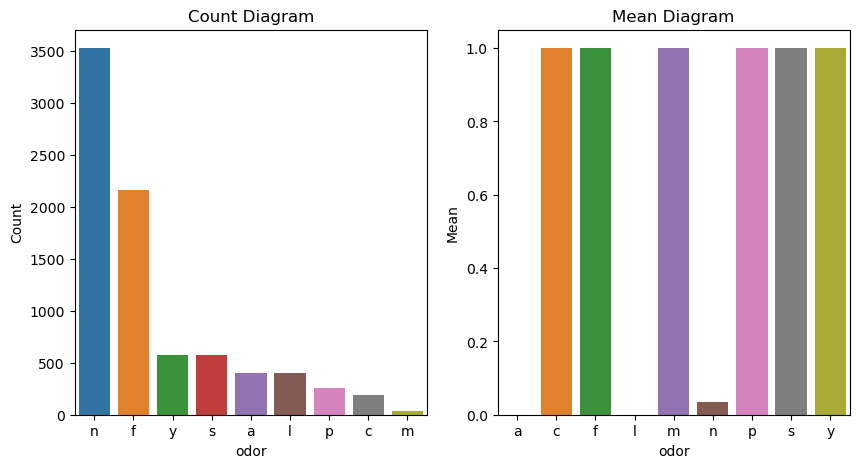

In [571]:
bar_plot(data_encod_analiz,"odor")

Buradan da biz görürük ki ən çox zəhərlilik oranına sahib olanlardan və ən çox sample olan f qoxulu göbələklərdir.f tipli göbələklərə 1 digərlərinə 0 deyərək bu sütunu kodlamaq olar.

In [572]:
data_encod_analiz["odor"] = data_encod_analiz["odor"].map(lambda x: 1 if x=="f" else 0)

### Gill color

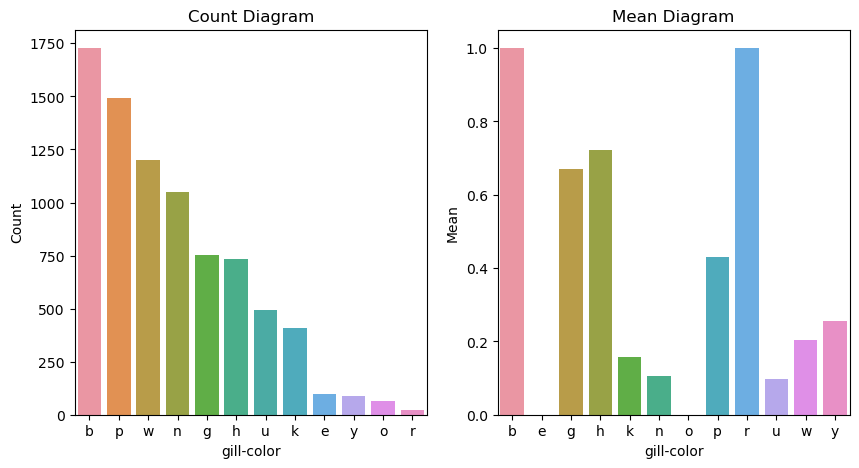

In [573]:
bar_plot(data_encod_analiz,"gill-color")

Buradan görünür ki, biz b,g,h rənglərini həm çoxluq baxımından həmçinin zəhərlilik baxımından digər rənglərdən üstünlük təşkil edir.Bu səbədən b ən üstün zəhərli rəng kimi g və h digər bir qrup və digər rənglər ayırıcı kimi kateqoriyaya ayıra bilərik.

In [574]:
data_encod_analiz["gill-color"] = data_encod_analiz["gill-color"].map(lambda x: 2 if x=="b" 
                                                                                  else 1 if x=="g"
                                                                                  else 1 if x=="h"
                                                                                  else 0)

### Stalk Root

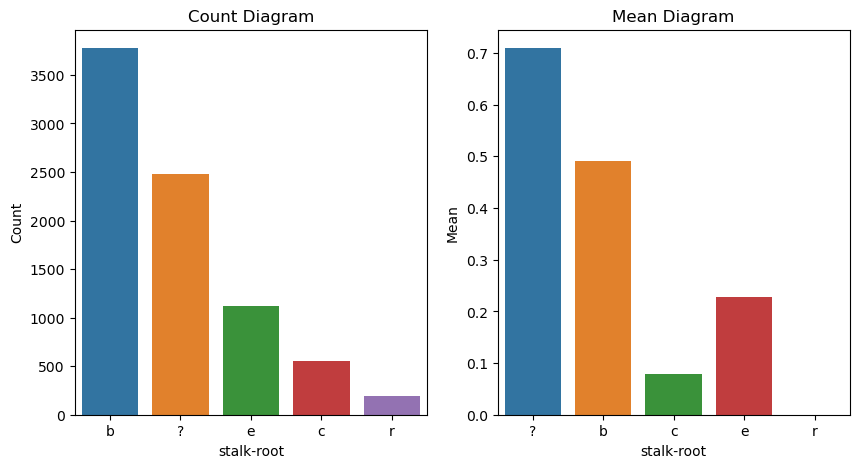

In [575]:
bar_plot(data_encod_analiz,"stalk-root")

Buradan görünür ki ? və b qrupu ən çox zəhərlilik oranına malik olan qrupdur.Bu səbəbdən bunları bir qrup halına digərlərini də bir qrup halına salaraq analiz etmək olar.

In [576]:
data_encod_analiz["stalk-root"] = data_encod_analiz["stalk-root"].map(lambda x: 1 if x=="?" 
                                                                                  else 1 if x=="b"
                                                                                  else 0)

### Stalk surface above ring

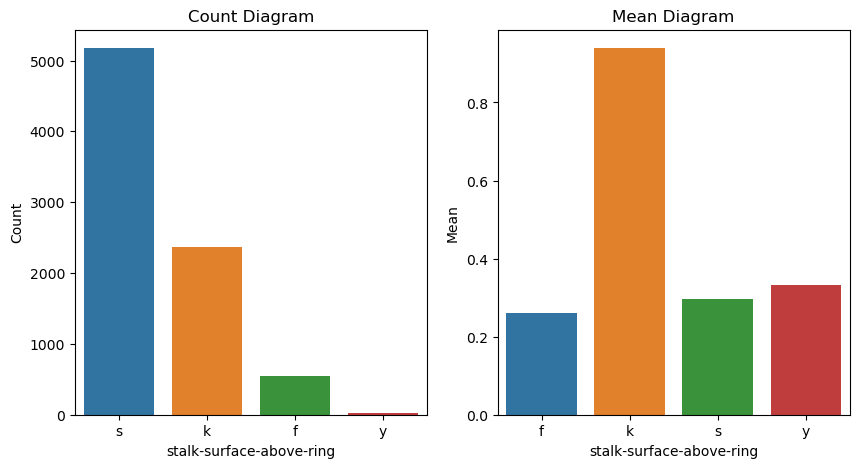

In [577]:
bar_plot(data_encod_analiz,"stalk-surface-above-ring")

Burada k qrupuna 1 digər qruplara 0 deyərək k qrupununu zəhərlilik oranına daha çox vurğulaya bilərik.

In [578]:
data_encod_analiz["stalk-surface-above-ring"] = data_encod_analiz["stalk-surface-above-ring"].map(lambda x: 1 if x=="k" 
                                                                                  else 0)

### Stalk surface below ring

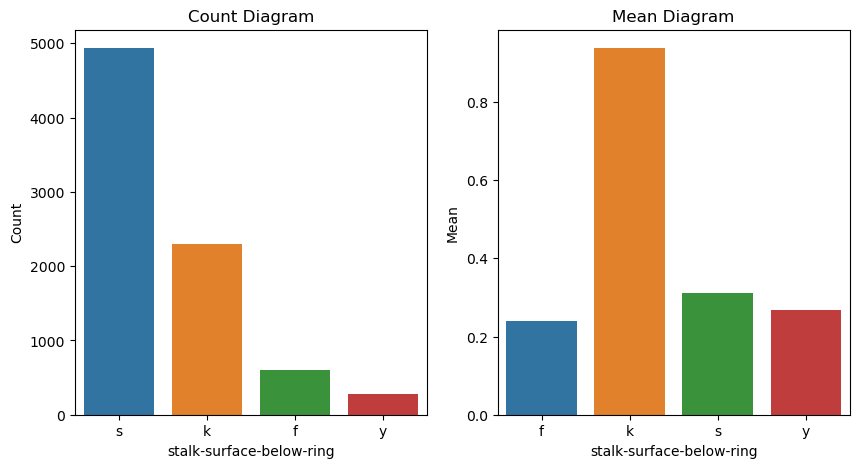

In [579]:
bar_plot(data_encod_analiz,"stalk-surface-below-ring")

Burada k qrupuna 1 digər qruplara 0 deyərək k qrupununu zəhərlilik oranına daha çox vurğulaya bilərik.

In [580]:
data_encod_analiz["stalk-surface-below-ring"] = data_encod_analiz["stalk-surface-below-ring"].map(lambda x: 1 if x=="k" 
                                                                                  else 0)

### Stalk color above ring

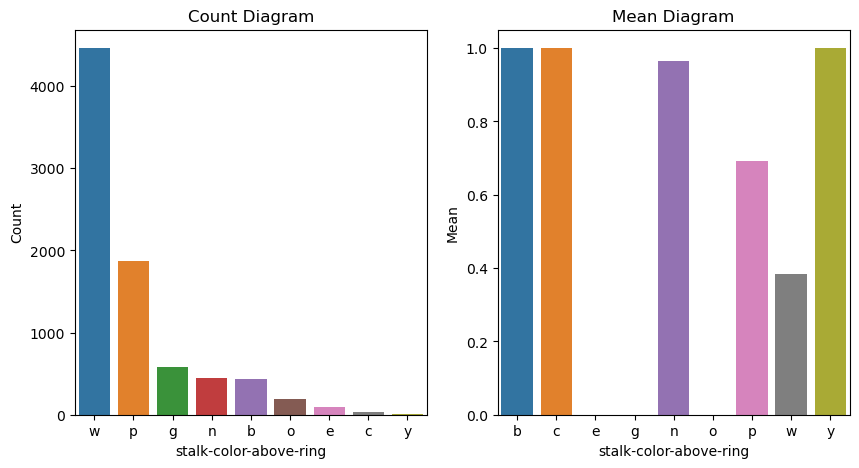

In [581]:
bar_plot(data_encod_analiz,"stalk-color-above-ring")

Buradan görünür ki p həm sample sayı həmdə zəhərlilik oranı çoxdur.P ni bir qrup digər rəngləri bir qrup kimi analiz edək.

In [582]:
data_encod_analiz["stalk-color-above-ring"] = data_encod_analiz["stalk-color-above-ring"].map(lambda x: 1 if x=="p" 
                                                                                  else 0)

### Stalk color below ring

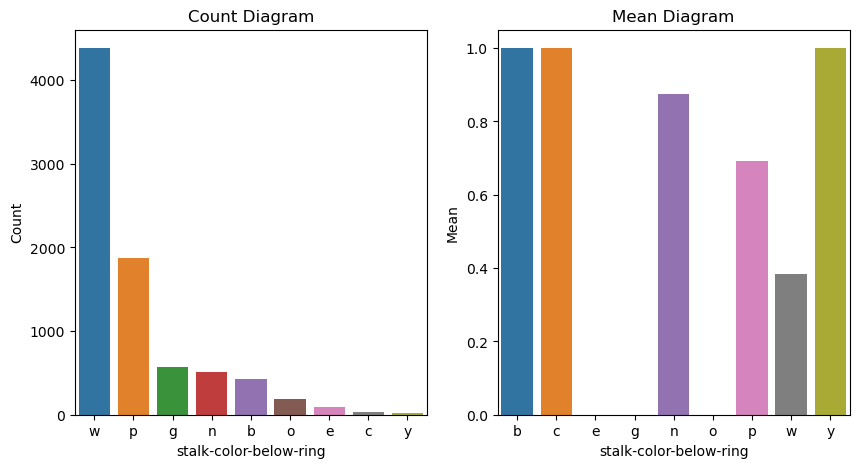

In [583]:
bar_plot(data_encod_analiz,"stalk-color-below-ring")

Buradan görünür ki, p həm sample sayı həmdə zəhərlilik oranı çoxdur.P ni bir qrup digər rəngləri bir qrup kimi analiz edək.

In [584]:
data_encod_analiz["stalk-color-below-ring"] = data_encod_analiz["stalk-color-below-ring"].map(lambda x: 1 if x=="p" 
                                                                                  else 0)

### Veil color

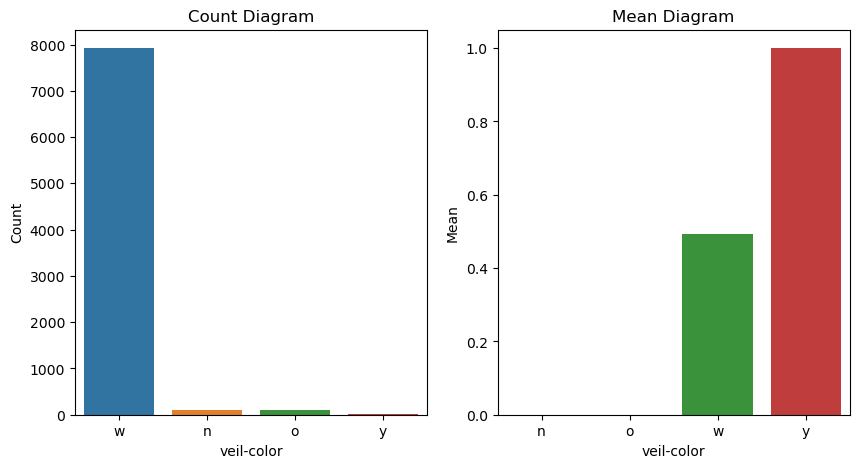

In [585]:
bar_plot(data_encod_analiz,"veil-color")

Burada gruplardan müəyyən analizlər çıxara bilmədiyimiz üçün bu qrupu One hot encoding edə bilərik.

In [586]:
data_encod_analiz = pd.get_dummies(data_encod_analiz,columns=["veil-color"],drop_first = True)

### Ring Number

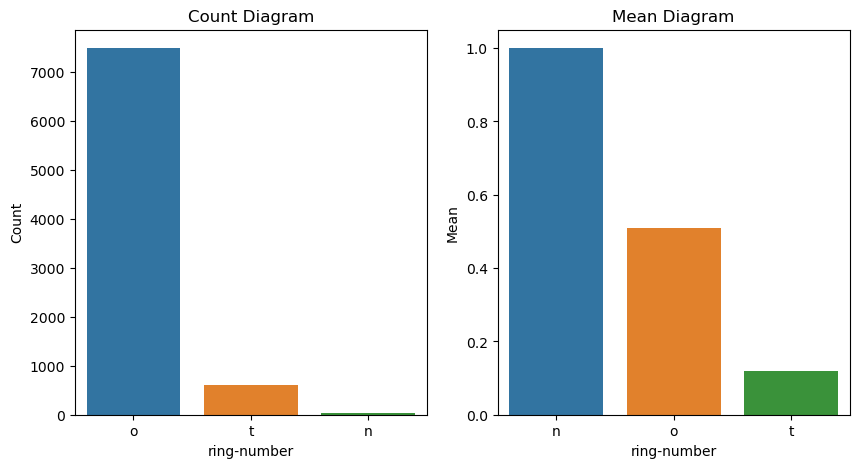

In [587]:
bar_plot(data_encod_analiz,"ring-number")

Buradan gruplardan müəyyən analizlər çıxara bilmədiyimiz üçün bu qrupu One hot encoding edə bilərik.

In [588]:
data_encod_analiz = pd.get_dummies(data_encod_analiz,columns=["ring-number"],drop_first = True)

### Ring type

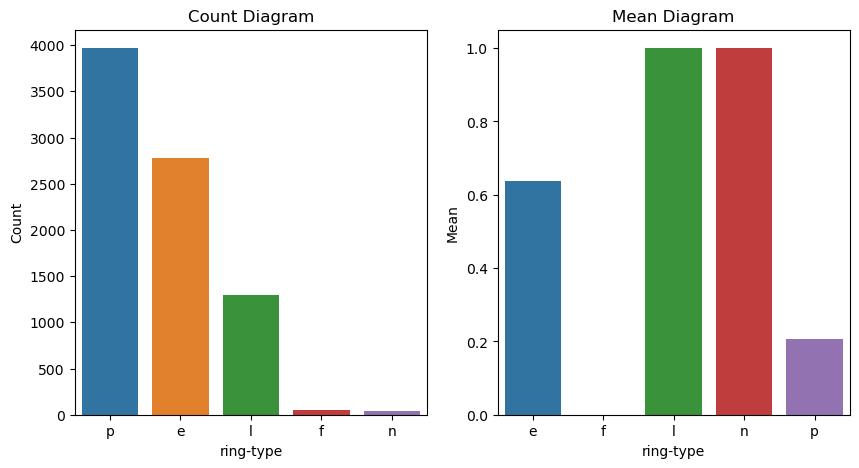

In [589]:
bar_plot(data_encod_analiz,"ring-type")

Buradan gruplardan müəyyən analizlər çıxara bilmədiyimiz üçün bu qrupu One hot encoding edə bilərik.

In [590]:
data_encod_analiz = pd.get_dummies(data_encod_analiz,columns=["ring-type"],drop_first = True)

### Spore print color

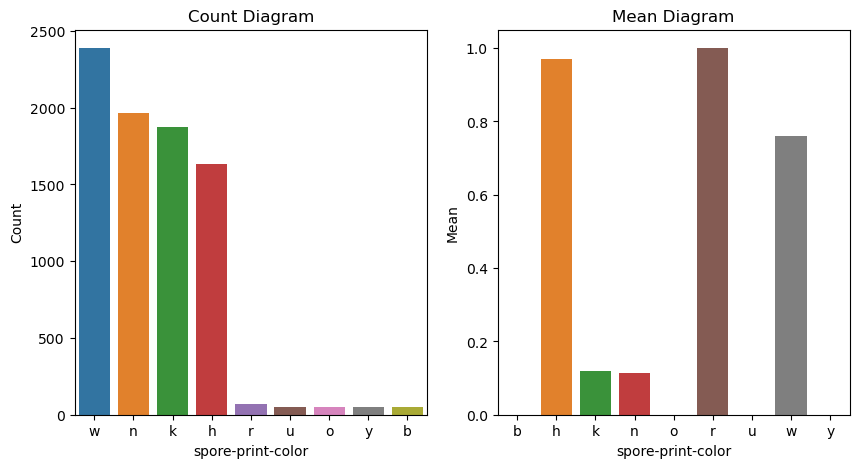

In [591]:
bar_plot(data_encod_analiz,"spore-print-color")

Buradan görünür ki w və h qrupu ən çox zəhərlilik oranına,həmçinin sample sayı ən çox olan qruplardır.Bu səbəbdən bunları bir qrup halına digərlərini də bir qrup halına salaraq analiz etmək olar.

In [592]:
data_encod_analiz["spore-print-color"] = data_encod_analiz["spore-print-color"].map(lambda x: 1 if x=="w" 
                                                                                  else 1 if x=="h"
                                                                                  else 0)

### Population

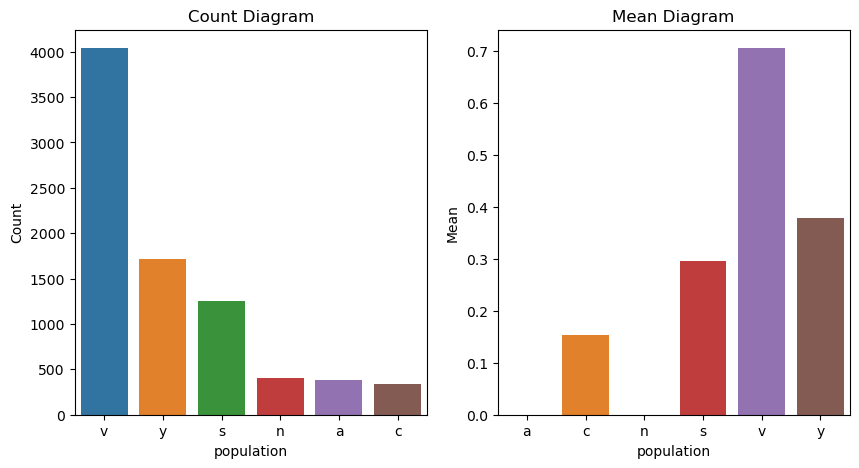

In [593]:
bar_plot(data_encod_analiz,"population")

Buradan v qrupuna zəhərlilik oranı ən çox olan qrup kimi, y və s ikinci zəhərlilik oranı ən çox olan qrup kimi,c ye və digər qruplara isə bunlardan fərqli zəhərlilik oranı olan qrup kimi analiz etmək olar.

In [594]:
data_encod_analiz["population"] = data_encod_analiz["population"].map(lambda x: 3 if x=="v" 
                                                                                  else 2 if x=="y"
                                                                                  else 2 if x=="s"
                                                                                  else 1 if x=="c"
                                                                                  else 0)

### Habitat

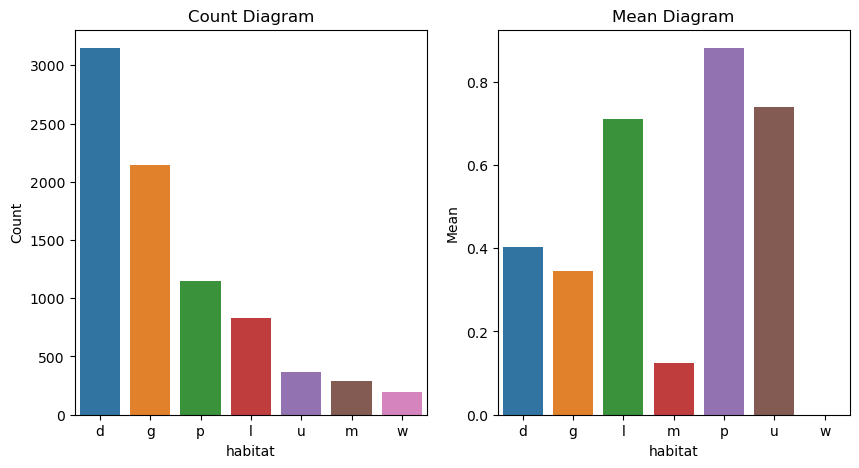

In [595]:
bar_plot(data_encod_analiz,"habitat")

Yaşayış yerlərinə görə bu qrupları One hot encoding edərək modelimə əlavə edə bilərik qruplar üzrə analizə açıq fərqliliklər yoxdur.

In [596]:
data_encod_analiz = pd.get_dummies(data_encod_analiz,columns=["habitat"],drop_first = True)

In [597]:
data_encod_analiz

,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,...,ring-type_f,ring-type_l,ring-type_n,ring-type_p,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8120,0,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8121,0,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8122,0,2,0,2,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Datanın son halı

In [598]:
data_part = data.loc[:,"bruises_t":"stalk-shape_t"]

In [599]:
data_new = pd.concat([data_encod_analiz,data_part],axis=1)

In [600]:
data_new.head()

,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


### TensorFlow

In [601]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

### Modelin qurulması

In [602]:
from tensorflow.keras.layers import Dense, Activation

### Train və Testə modeli ayırmaq

In [603]:
X = data_new.drop(columns="class_p",axis = 1)
X = X.values
y = data_new["class_p"].values

In [604]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [605]:
X_train.shape

(5686, 36)

In [606]:
y_train.shape

(5686,)

### Model - Layerlərin siyahısı

In [607]:
model = Sequential([
    Dense(units=8),
    Dense(units=8),
    Dense(units=8)
])

In [608]:
model = Sequential()
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(8))

### Model - layerlərin əlavə edilməsi

In [609]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))


model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [610]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
178/178 [==============================] - 1s 1ms/step - loss: 0.4813 - accuracy: 0.8028
Epoch 2/100
178/178 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9391
Epoch 3/100
178/178 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9580
Epoch 4/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9710
Epoch 5/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9822
Epoch 6/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9870
Epoch 7/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9910
Epoch 8/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9944
Epoch 9/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9954
Epoch 10/100
178/178 [==============================] - 0s 1ms/step - loss: 0.0123 - accura

178/178 [==============================] - 0s 1ms/step - loss: 7.4609e-07 - accuracy: 1.0000
Epoch 80/100
178/178 [==============================] - 0s 1ms/step - loss: 7.1973e-07 - accuracy: 1.0000
Epoch 81/100
178/178 [==============================] - 0s 1ms/step - loss: 7.2294e-07 - accuracy: 1.0000
Epoch 82/100
178/178 [==============================] - 0s 1ms/step - loss: 7.0194e-07 - accuracy: 1.0000
Epoch 83/100
178/178 [==============================] - 0s 1ms/step - loss: 6.7339e-07 - accuracy: 1.0000
Epoch 84/100
178/178 [==============================] - 0s 1ms/step - loss: 6.6884e-07 - accuracy: 1.0000
Epoch 85/100
178/178 [==============================] - 0s 1ms/step - loss: 6.4317e-07 - accuracy: 1.0000
Epoch 86/100
178/178 [==============================] - 0s 1ms/step - loss: 6.3459e-07 - accuracy: 1.0000
Epoch 87/100
178/178 [==============================] - 0s 1ms/step - loss: 6.2720e-07 - accuracy: 1.0000
Epoch 88/100
178/178 [==============================] - 0s 

In [611]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [612]:
# Train və testin skorları
print("Train Score: {0:.4f}".format(training_score[0]))
print("Test Score: {0:.4f}".format(test_score[0]))

Train Score: 0.0000
Test Score: 0.0000


In [613]:
# testin probability dəyərləri
test_predictions_prob = model.predict(X_test)

77/77 [==============================] - 0s 1ms/step


In [614]:
# test predict dəyərləri
threshold = 0.5
test_predictions = (test_predictions_prob > threshold).astype("int32")
test_predictions

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [615]:
# test dəyərlərimiz ilə predict dəyərlərdən ibarət dataframe
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(2438,))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

In [619]:
#dataframe ön baxış
pred_df.head()

,Test Y,Model Predictions
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


### Confusion Matrix

Text(50.722222222222214, 0.5, 'Values')

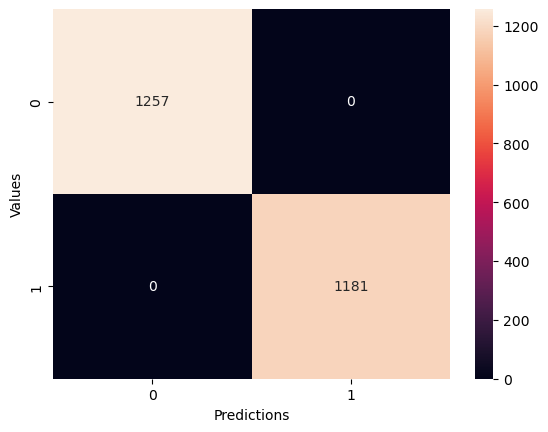

In [616]:
sns.heatmap(confusion_matrix(pred_df['Test Y'],pred_df['Model Predictions']),annot=True,fmt="0.0f")
plt.xlabel("Predictions")
plt.ylabel("Values")

### Roc Curve

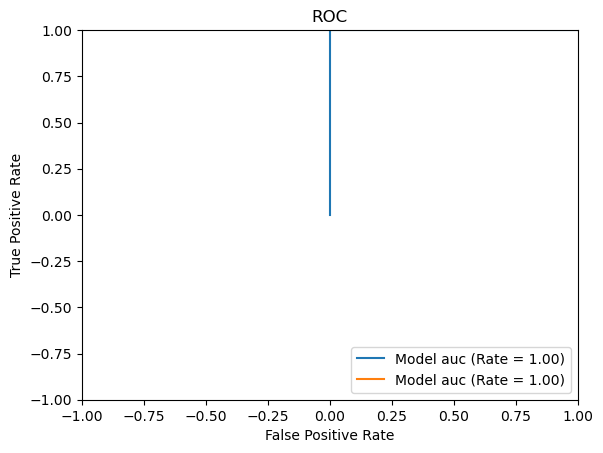

In [617]:
tpr,fpr,treshold = roc_curve(pred_df['Test Y'],test_predictions_prob)
auc = roc_auc_score(pred_df['Test Y'],pred_df['Model Predictions'])
plt.plot(tpr,fpr,treshold,label = "Model auc (Rate = %.2f)"%auc)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc = "lower right")